<a href="https://colab.research.google.com/github/abubakardawood/dome_sensor_prototype_1/blob/main/data_processing_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[[       1.416200        0.000000        0.990000 ...       -0.002777
        -0.024986       -0.032649]
 [       1.447300        0.000000        0.990000 ...       -0.000696
         0.017798       -0.015385]
 [       1.477200        0.000000        0.990000 ...       -0.008801
        -0.016663       -0.049641]
 ...
 [      94.314000        4.000000        1.140000 ...        0.004771
        -0.003031       -5.203559]
 [      94.345400        4.000000        1.140000 ...        0.004651
        -0.012722       -5.176703]
 [      94.378600        4.000000        1.140000 ...        0.010816
        -0.036636       -5.220532]]
2.07133
0.024301195443845968
2.07133
[       0.000000        0.031100        0.061000 ...       92.897800
       92.929200       92.962400]
[       2.070000        2.070000        2.070000 ...        2.360000
        2.360000        2.370000]
[       0.041206        0.023536        0.053097 ...        5.203562
        5.176721        5.220672]
0.1316109358580292

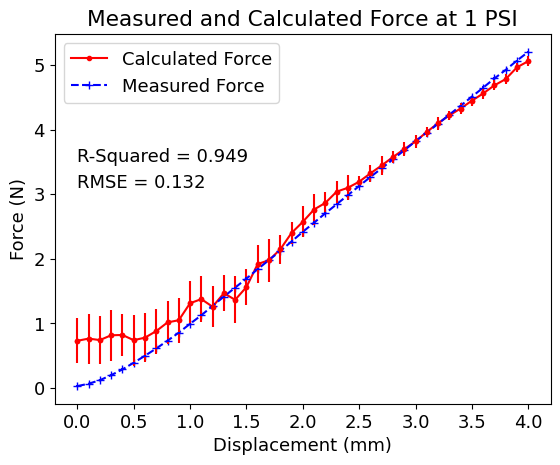

In [ ]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import bisect
from scipy.interpolate import interp1d
from google.colab import files
from matplotlib import pyplot as plt, patches
from sympy import S, symbols, printing
from decimal import Decimal, getcontext
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 13})

np.set_printoptions(formatter={'float_kind':'{:15f}'.format})


tolerance = 3700

# file_path_1 = "drive/MyDrive/Colab Notebooks/Palpable/Hamlyn/0_PSI_4mm_1.csv"
# file_path_1 = "drive/MyDrive/Colab Notebooks/Palpable/Hamlyn/0_5_PSI_4mm_3.csv"
file_path_1 = "drive/MyDrive/Colab Notebooks/Palpable/Hamlyn/1_PSI_4mm_1.csv"

## Choose the appropriate z-equation
# z = [-43.328, 436.7, -1660.5, 2829.4, -1823.25] #For 0 PSI
# z = [-635.2, 6018.5, -21382, 33765, -19997.8] #For 0.5 PSI
z = [-323.23, 3010.6, -10519, 16346, -9531.45] #For 1 PSI

### Calculated Stiffnesses
# Stiffness = 1016.133 # at 0
# Stiffness = 1134.34 # at 0.5
Stiffness = 1301.633 # at 1

experiment_data_1 = np.genfromtxt(file_path_1, delimiter=",")
print(experiment_data_1)

Fx_1_max = np.round(np.mean(experiment_data_1[-30:, 4]) ,5)
# print(Fx_1_max)
Fy_1_max = np.round(np.mean(experiment_data_1[-30:, 5]) ,5)
# print(Fy_1_max)
Fz_1_max = np.round(np.mean(experiment_data_1[-30:, 6]) ,5)
# print(Fz_1_max)

F_1_max = np.sqrt((Fx_1_max*Fx_1_max) + (Fy_1_max*Fy_1_max) + (Fz_1_max*Fz_1_max))
# print(F_1_max)

### Formula for stiffness calculation

# Stiffness = F_1_max / ((4)/1000)
# print("Stifness = ", Stiffness)



time_1 = experiment_data_1[:, 0]
# print(time_1)
time_1_zero = time_1[0]
# print(time_1_zero)

zero_data_1 = experiment_data_1[:30, :]
# print(zero_data_1)
reflective_1_zero = np.round(np.mean(zero_data_1[:, 3], 0), 5)
print(reflective_1_zero)


Fx_1_zero = experiment_data_1[0:30, 4]
Fy_1_zero = experiment_data_1[0:30, 5]
Fz_1_zero = experiment_data_1[0:30, 6]
# print(Fx_1_zero)
# print(Fy_1_zero)
# print(Fz_1_zero)

Fx_1_zero = np.round(np.mean(Fx_1_zero) ,5)
# print(Fx_1_zero)
Fy_1_zero = np.round(np.mean(Fy_1_zero) ,5)
# print(Fy_1_zero)
Fz_1_zero = np.round(np.mean(Fz_1_zero) ,5)
# print(Fz_1_zero)

F_1_zero = np.sqrt((Fx_1_zero*Fx_1_zero) + (Fy_1_zero*Fy_1_zero) + (Fz_1_zero*Fz_1_zero))
print(F_1_zero)


print(reflective_1_zero)


time_corrected = time_1 - time_1_zero
print(time_corrected)



indent_1 = experiment_data_1[:, 1]
air_pressure_1 = experiment_data_1[:, 2]

# normalized_proximity_1 = (np.abs(experiment_data_1[:, 4] - proximity_1_zero)/proximity_1_zero)*100
normalized_proximity_1 = (experiment_data_1[:, 3])
print(normalized_proximity_1)
Fx_1 = experiment_data_1[:, 4]
Fy_1 = experiment_data_1[:, 5]
Fz_1 = experiment_data_1[:, 6]

resultant_force = np.sqrt(Fx_1*Fx_1 + Fy_1*Fy_1 + Fz_1*Fz_1)
print(resultant_force)



# print([ "{:0.12f}".format(x) for x in z ])
p = np.poly1d(z)
# ax.plot(normalized_proximity_1, p(normalized_proximity_1,))

# estimated_force = Stiffness * (p(normalized_proximity_1))/1000


data_force = {'Category': indent_1,
        'Values': resultant_force}
df = pd.DataFrame(data_force)
# Group by category and calculate mean and standard deviation
grouped_data = df.groupby('Category')['Values'].agg(['mean', 'std'])
# print(grouped_data)


estimated_force = Stiffness*p(normalized_proximity_1)/1000

data_estimated_force = {'Category': indent_1,
        'Values': estimated_force}
df = pd.DataFrame(data_estimated_force)

# Group by category and calculate mean and standard deviation
grouped_data_estimated_force = df.groupby('Category')['Values'].agg(['mean', 'std'])
# print(grouped_data_estimated_force['std'])

# Plotting
fig, ax = plt.subplots()

# ax.plot(normalized_proximity_1, indent_1)

# ax.plot(normalized_proximity_1, p(normalized_proximity_1))

# Plot means as a line
# ax.plot(np.abs(Fz_1), Stiffness*(p(normalized_proximity_1))/1000)
grouped_data_estimated_force['mean'].plot(marker='.', linestyle='-', ax=ax, label='Calculated Force', color = 'red')
grouped_data['mean'].plot(marker='+', linestyle='--', ax=ax, label='Measured Force', color = 'blue')

# # Plot error bars using standard deviation
ax.errorbar(grouped_data_estimated_force.index, grouped_data_estimated_force['mean'], yerr=grouped_data_estimated_force['std'], linestyle='None', marker='.', color='red')
ax.errorbar(grouped_data.index, grouped_data['mean'], yerr=grouped_data['std'], linestyle='None', color='blue')


# Set labels and title
ax.set_xlabel('Displacement (mm)')
ax.set_ylabel('Force (N)')
ax.set_title('Measured and Calculated Force at 1 PSI')
ax.legend()
plt.annotate("R-Squared = {:.3f}".format(r2_score(np.abs(Fz_1), Stiffness*(p(normalized_proximity_1))/1000)), (0, 3.5))
plt.annotate("RMSE = {:.3f}".format(mean_squared_error(np.abs(Fz_1), Stiffness*(p(normalized_proximity_1))/1000)), (0, 3.1))

# Show the plot
# plt.show()

rms = mean_squared_error(np.abs(Fz_1), Stiffness*(p(normalized_proximity_1))/1000)
print(rms)

R_squared = r2_score(np.abs(Fz_1), Stiffness*(p(normalized_proximity_1))/1000)
print(R_squared)

plt.savefig('1_PSI_1.pdf', dpi=600)
# files.download("1_PSI_1.pdf")


